#  Data gathering 


## News papers to scrape 

In [1]:
list_1 = ["https://www.theguardian.com/international",
           "https://www.nytimes.com/",
            "https://www.economist.com/",
            "https://www.huffpost.com/",
            "https://www.nbcnews.com/",
            "https://www.foxnews.com/"]



#### Imports for scrape


In [2]:
!pip install newspaper3k

     |████████████████████████████████| 215kB 18.0MB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
     |████████████████████████████████| 7.4MB 23.8MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp37-none-any.whl size=13538 sha256=678b244b2508ee0f8ae74be3ca2e520a8d85086da122d210ade502275edee90a
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp37-none-any.whl size=7398406 sha256=9022d131211930e6db9d085cf771ccc6b62b8f6fa860bfdbd649bd5a5b46a1d1
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp37-none-any.whl size=3358 sha256=9e36bd0f3b16006115a206f647a38a14d6fe2c77fe0120db6c377f58249da148
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb4

In [3]:
import nltk 
import newspaper 
import pandas as pd
from newspaper import Article
import numpy as np

#### First build the newspapers

In [4]:
# don't run this cell multiple times or you risk getting ip blocked and will need to reset the computer.

count = 0   
paper_list = []
for paper in list_1:
    paper_n = newspaper.build(paper)
    paper_list.append(paper_n)
    count = count+1
    print("paper added ", count)


paper added  1
paper added  2
paper added  3
paper added  4
paper added  5
paper added  6


#### Creating a url list to pass to our dictionaries


In [5]:
# This will imput our paper we have built and scrape the top 20 "articles"
def url_compiler(_paper_):
    urls_list = []
    count = 0 
    for article in _paper_.articles:
        if count != 26:
            url = article.url
            urls_list.append(url)
            count = count+1
            print(f"article added, count{count}")
        else:
            break
    return urls_list


#### Creating the url lists for each newspaper

In [6]:
url_list_guardian = url_compiler(paper_list[0])
url_list_ny_times = url_compiler(paper_list[1])
url_list_economist = url_compiler(paper_list[2])
url_list_huff = url_compiler(paper_list[3])
url_list_nbc = url_compiler(paper_list[4])
url_list_fox = url_compiler(paper_list[5])

article added, count1
article added, count2
article added, count3
article added, count4
article added, count5
article added, count6
article added, count7
article added, count8
article added, count9
article added, count10
article added, count11
article added, count12
article added, count13
article added, count14
article added, count15
article added, count16
article added, count17
article added, count18
article added, count19
article added, count20
article added, count21
article added, count22
article added, count23
article added, count24
article added, count25
article added, count26
article added, count1
article added, count2
article added, count3
article added, count4
article added, count5
article added, count6
article added, count7
article added, count8
article added, count9
article added, count10
article added, count11
article added, count12
article added, count13
article added, count14
article added, count15
article added, count16
article added, count17
article added, count18
articl

#### Function to build the dataframe with newspapers, keywords, authors and dates


In [7]:
def article_compiler(url_list):
    '''
    Creating a data frame with all the texts, key words and authors of the articles 
    '''
    a_authors = []
    a_text = []
    a_keywords = []
    a_date = []
    a_title = []
    count = 0 
    #getting the urls 
    for url in url_list:
        url_comp = f"{url}"
        article = Article(url_comp)
        article.download()
        article.parse()
    
        #getting the authors
        author1 = article.authors
        a_authors.append(author1)
        
        # getting the text 
        text1 = article.text
        a_text.append(text1)
        
        # getting date 
        date1 = article.publish_date
        a_date.append(date1)
        
        
        #getting title
        title1 = article.title
        a_title.append(title1)
        
        #getting keywords 
        article.nlp()
       
        
        key1 = article.keywords
        a_keywords.append(key1)
        count = count + 1 
        
        print(f"ran{count}")
    #compiling it all into a data frame 
    df = pd.DataFrame({"Authors" : a_authors, "Body" :a_text,"Keywords":  a_keywords, "Date": a_date, "Title": a_title})
    return df

#### Passing each data frame and builduing the data frames

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
df_guardian = article_compiler(url_list_guardian)
df_ny_times = article_compiler(url_list_ny_times)
df_economist = article_compiler(url_list_economist)
df_huff = article_compiler(url_list_huff)
df_nbc = article_compiler(url_list_nbc)
df_fox = article_compiler(url_list_fox)


ran1
ran2
ran3
ran4
ran5
ran6
ran7
ran8
ran9
ran10
ran11
ran12
ran13
ran14
ran15
ran16
ran17
ran18
ran19
ran20
ran21
ran22
ran23
ran24
ran25
ran26
ran1
ran2
ran3
ran4
ran5
ran6
ran7
ran8
ran9
ran10
ran11
ran12
ran13
ran14
ran15
ran16
ran17
ran18
ran19
ran20
ran21
ran22
ran23
ran24
ran25
ran26
ran1
ran2
ran3
ran4
ran5
ran6
ran7
ran8
ran9
ran10
ran11
ran12
ran13
ran14
ran15
ran16
ran17
ran18
ran19
ran20
ran21
ran22
ran23
ran24
ran25
ran26
ran1
ran2
ran3
ran4
ran5
ran6
ran7
ran8
ran9
ran10
ran11
ran12
ran13
ran14
ran15
ran16
ran17
ran18
ran19
ran20
ran21
ran22
ran23
ran24
ran25
ran26
ran1
ran2
ran3
ran4
ran5
ran6
ran7
ran8
ran9
ran10
ran11
ran12
ran13
ran14
ran15
ran16
ran17
ran18
ran19
ran20
ran21
ran22
ran23
ran24
ran25
ran26
ran1
ran2
ran3
ran4
ran5
ran6
ran7
ran8
ran9
ran10
ran11
ran12
ran13
ran14
ran15
ran16
ran17
ran18
ran19
ran20
ran21
ran22
ran23
ran24
ran25
ran26


#### We drop the first row of data since often its information about the website

In [10]:
df_guardian = df_guardian.drop(df_guardian.index[0])
df_ny_times = df_ny_times.drop(df_ny_times.index[0])
df_economist = df_economist.drop(df_economist.index[0])
df_huff = df_huff.drop(df_huff.index[0])
df_nbc = df_nbc.drop(df_nbc.index[0])
df_fox = df_fox.drop(df_fox.index[0])

#### Adding option to visualize and save data frame for each newspaper 


In [11]:
#df.to_csv("ny_times_Mar_4.csv")
#df_fox

#### Fox has a row of videos at the top our scraper takes, so we will turn those into nan's strings before continuing

In [12]:
# replacing empty bodies with nans then droping the nans 
df_fox["Body"].replace('', np.nan, inplace=True)

#### If there is no article, we drop the whole row. 
We don't drop the row we just only keep rows with value for the body part. 


In [13]:
df_guardian = df_guardian[df_guardian["Body"].notna()]
df_ny_times = df_ny_times[df_ny_times["Body"].notna()]
df_economist = df_economist[df_economist["Body"].notna()]
df_huff = df_huff[df_huff["Body"].notna()]
df_nbc = df_nbc[df_nbc["Body"].notna()]
df_fox = df_fox[df_fox["Body"].notna()]

# Data cleaning


#### Importing modules


In [14]:
import re

#### Building cleaner function for first round of cleaning data


In [15]:
def  clean_text(df, text_field, new_text_field_name):
    # turns everything into lower cases
    df[new_text_field_name] = df[text_field].str.lower()
    
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df


### First round of cleaning

#### We create new columns and assign them values since before they were just objects and that interferes with regex.

In [16]:
#creating to new columns that has a type as a string to avoid type issues when doing regex

#for df1 
df_guardian['authors'] = df_guardian['Authors'].astype('string')
df_guardian['keywords'] = df_guardian['Keywords'].astype('string')
#for df2
df_ny_times['authors'] = df_ny_times['Authors'].astype('string')
df_ny_times['keywords'] = df_ny_times['Keywords'].astype('string')
#for df3 
df_economist['authors'] = df_economist['Authors'].astype('string')
df_economist['keywords'] = df_economist['Keywords'].astype('string')
#for df4 
df_huff['authors'] = df_huff['Authors'].astype('string')
df_huff['keywords'] = df_huff['Keywords'].astype('string')
#for df5 
df_nbc['authors'] = df_nbc['Authors'].astype('string')
df_nbc['keywords'] = df_nbc['Keywords'].astype('string')
#for df6
df_fox['authors'] = df_fox['Authors'].astype('string')
df_fox['keywords'] = df_fox['Keywords'].astype('string')

#### Creating a function to pass the cleaner function to each column and dropping the old columns

In [17]:
def cleaner(df):
    #cleans the articles
    data_clean = clean_text(df, "Body", "Body")
    # cleans the Author names
    data_clean = clean_text(data_clean, "authors", "authors")
    #Cleans the keywords
    data_clean = clean_text(data_clean, "keywords", "keywords")
    #Our clean data now becomes our df 
    df = data_clean.drop(columns = ["Authors", "Keywords"])
    return df

#### Passing the cleaner function we just created

In [18]:
df_guardian = cleaner(df_guardian)
df_ny_times = cleaner(df_ny_times)
df_economist = cleaner(df_economist)
df_huff = cleaner(df_huff)
df_nbc = cleaner(df_nbc)
df_fox = cleaner(df_fox)

#### Adding a length of article column to filter out short articles or noise

In [19]:
def article_len(df): 
    '''
    adds a len column that counts all characters in the article
    the print can be removed, only included for debbuging 
    '''
    count=0
    length = []
    for text in df["Body"]:
            len_1 = len(text)
            length.append(len_1)
            count = count +1 
            print("len added", count)
    df["len"] = length
    return df

#### Using the function on the df to add the column

In [20]:
df_guardian = article_len(df_guardian)
df_ny_times = article_len(df_ny_times)
df_economist = article_len(df_economist)
df_huff = article_len(df_huff)
df_nbc = article_len(df_nbc)
df_fox = article_len(df_fox)

len added 1
len added 2
len added 3
len added 4
len added 5
len added 6
len added 7
len added 8
len added 9
len added 10
len added 11
len added 12
len added 13
len added 14
len added 15
len added 16
len added 17
len added 18
len added 19
len added 20
len added 21
len added 22
len added 23
len added 24
len added 25
len added 1
len added 2
len added 3
len added 4
len added 5
len added 6
len added 7
len added 8
len added 9
len added 10
len added 11
len added 12
len added 13
len added 14
len added 15
len added 16
len added 17
len added 18
len added 19
len added 20
len added 21
len added 22
len added 23
len added 24
len added 25
len added 1
len added 2
len added 3
len added 4
len added 5
len added 6
len added 7
len added 8
len added 9
len added 10
len added 11
len added 12
len added 13
len added 14
len added 15
len added 16
len added 17
len added 18
len added 19
len added 20
len added 21
len added 22
len added 23
len added 24
len added 25
len added 1
len added 2
len added 3
len added 4
len 

#### Defining a function to drop short articles 

In [21]:
def index_dropper(df):
    index_names = df[ df['len'] < 1100 ].index 
    df.drop(index_names, inplace = True) 
    index_names = df[ df['len'] > 15000 ].index 
    df.drop(index_names, inplace = True) 
    return df

#### Passing the function and dropping articles 

In [22]:
df_guardian = index_dropper(df_guardian)
df_ny_times = index_dropper(df_ny_times)
df_economist = index_dropper(df_economist)
df_huff = index_dropper(df_huff)
df_nbc = index_dropper(df_nbc)
df_fox = index_dropper(df_fox)

# Summarization 

#### We import our pipeline from the hugging face transformers library

In [23]:
!pip install transformers

     |████████████████████████████████| 1.9MB 16.3MB/s 
     |████████████████████████████████| 890kB 52.4MB/s 
     |████████████████████████████████| 3.2MB 50.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=d7cc829d82afca648d30e4b316512491d2b25ec51b72a854587cd5a003cc0d47
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [24]:
from transformers import pipeline

### Introducing Transformers 

A transformer is a machine learning architecture that combines an encoder and a decoder and jointly learns them. This allows the model to convert an input sentence in our case, but the same would happen for an image, and converts it into a vectorized format before converting it back to a sentence or an image. 

The easies way to understand transformers is to imagine them as a translator, where a sentence is inputed in one language, the model then turns it into an intermediate language so that it can understand its meaning and then returns it in another language. In this case each language would be an encoder and then a decoder and the intermediate language would be how they talk to each other. 


### We are using BART(Bidirectional and Auto-Regressive Transformers): 

BART is a transformer, BART is also a denoising autoencoder for penetrating sequence to sequence models. 
BART was trained and tested using a CNN/Daily Mail dataset composed of articles and highlights for the model to learn from. 

As we have explained before transformers are composed of two main parts an encoder and a decoder. BART is no different.


#### BERT (Bidirectional Encoder Representation Transformer):

The econder part and most popular in the NLP realm, BERT is extremly powerful specially for tasks such as sentiment analysis and text prediction but is quite lack luster in the summarization aspect.  
BERT iss a pre trained model with about 345 million parameters (or 110 if choosing the downscaled version for smaller scale tasks) 
BERT’s bidirectional approach (MLM) converges slower than left-to-right approaches (because only 15% of words are predicted in each batch) but bidirectional training still outperforms left-to-right training after a small number of pre-training steps.


#### GPT (Generative Pre - Training):
GPT engloves a bunch of text generation pre trained models made by OpenAi, we will be using GPT-3 and it is really good at text generation. But where it excells in generation it lacks in accuracy. 


By joining both models, as we have already specified one in the encoder and the other in the decoder.
This is where BART comes in, which stands for Bidirectional and Auto-Regressive Transformers (Lewis et al., 2019). It essentially generalizes BERT and GPT based architectures by using the standard Seq2Seq Transformer architecture, while mimicking BERT/GPT functionality and training objectives. 

#### HuggingFace Transformers:

HuggingFace Transformers is a platform with pre-trained transformers. Training a state of the art Transformer like BART is extremly hard, not so much due to the code complexity but the Gpu cost of having it running for so long and learning. So we are importing a pre-trained model that was used to develop BART.


#### We initialize the model

In [25]:
summarizer = pipeline("summarization", framework = "tf")

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


#### We create a function that will take in the cleaned data frame and append to it the summaries
We set parameters for the summarizer as well as count to keep track of the progress of the model.

In [26]:
def Adder(cleaned_df):
    '''
    Creates a summary and appends it to the data frame 
    '''
    summaries = []
    count = 0
    for text in cleaned_df["Body"]:
        summary = summarizer(text, min_length=75, max_length=250)
        summaries.append(summary)
        count = count +1 
        print("summary added", count)
    cleaned_df["Summary"] = summaries
    
    return cleaned_df


#### Running the model on all data frames

This step will take a while so please have patience

In [27]:
df_guardian = Adder(df_guardian)

Token indices sequence length is longer than the specified maximum sequence length for this model (944 > 512). Running this sequence through the model will result in indexing errors


summary added 1
summary added 2
summary added 3
summary added 4
summary added 5
summary added 6
summary added 7
summary added 8
summary added 9
summary added 10
summary added 11
summary added 12
summary added 13
summary added 14
summary added 15
summary added 16
summary added 17
summary added 18
summary added 19
summary added 20
summary added 21
summary added 22
summary added 23


In [28]:
df_ny_times = Adder(df_ny_times)

summary added 1
summary added 2
summary added 3


Your max_length is set to 250, but you input_length is only 231. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


summary added 4
summary added 5
summary added 6
summary added 7
summary added 8


Your max_length is set to 250, but you input_length is only 246. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


summary added 9
summary added 10
summary added 11
summary added 12
summary added 13
summary added 14
summary added 15


In [29]:
df_economist = Adder(df_economist)

summary added 1
summary added 2
summary added 3
summary added 4
summary added 5
summary added 6
summary added 7
summary added 8
summary added 9
summary added 10
summary added 11
summary added 12
summary added 13
summary added 14
summary added 15
summary added 16
summary added 17
summary added 18
summary added 19
summary added 20
summary added 21
summary added 22


In [30]:
df_huff = Adder(df_huff)

summary added 1
summary added 2
summary added 3
summary added 4
summary added 5
summary added 6
summary added 7
summary added 8
summary added 9
summary added 10
summary added 11
summary added 12
summary added 13
summary added 14


In [31]:
df_nbc = Adder(df_nbc)

summary added 1
summary added 2
summary added 3
summary added 4
summary added 5
summary added 6
summary added 7
summary added 8
summary added 9
summary added 10
summary added 11
summary added 12
summary added 13
summary added 14
summary added 15
summary added 16
summary added 17
summary added 18
summary added 19
summary added 20
summary added 21
summary added 22
summary added 23


In [32]:
df_fox = Adder(df_fox)

summary added 1
summary added 2
summary added 3
summary added 4
summary added 5
summary added 6
summary added 7
summary added 8
summary added 9
summary added 10
summary added 11
summary added 12
summary added 13


#### The returned output is a dictionary so we need to turn it into a regular column with string form. So we create a function and pass it. 

In [33]:
def Summary_normalizer(df):
    summary_str = []
    for summary in df.Summary:   
        summ = summary[0]
        text_2 = summ["summary_text"]
        summary_str.append(text_2)
        
    df["Summaries"] = summary_str
    return df

In [34]:
df_guardian = Summary_normalizer(df_guardian)
df_ny_times = Summary_normalizer(df_ny_times)
df_economist = Summary_normalizer(df_economist)
df_huff = Summary_normalizer(df_huff)
df_nbc = Summary_normalizer(df_nbc)
df_fox = Summary_normalizer(df_fox)

#### Now fix the data frames structure so we can work with it down the line.
We drop the dictionary and the length since we don't need them anymore and rename it to the original name again. 

In [35]:
df_guardian = df_guardian.drop(columns = ["Summary", "len"])
df_ny_times = df_ny_times.drop(columns = ["Summary", "len"])
df_economist = df_economist.drop(columns = ["Summary", "len"])
df_huff = df_huff.drop(columns = ["Summary", "len"])
df_nbc = df_nbc.drop(columns = ["Summary", "len"])
df_fox = df_fox.drop(columns = ["Summary", "len"])

####  Reset the indexes for down the line.
After doing this trying to index into a single row will give an error, either use iloc or index to the column and then the row 

In [36]:
df_guardian = df_guardian.reset_index(drop=True)
df_ny_times = df_ny_times.reset_index(drop=True)
df_economist = df_economist.reset_index(drop=True)
df_huff = df_huff.reset_index(drop=True)
df_nbc = df_nbc.reset_index(drop=True)
df_fox = df_fox.reset_index(drop=True)

# Visualizations 

### We first will create a document - term matrix using the count Vectorizer feature we will also remove english stop words

#### Import and initialize the Vectorizer 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

#### Before we fit the data we get titles to use as an index for our document term matrix and pdf generation

In [38]:
index_guardian = df_guardian.Title
index_ny_times = df_ny_times.Title
index_economist = df_economist.Title
index_huff = df_huff.Title
index_nbc = df_nbc.Title
index_fox = df_fox.Title

#### We now use the vectorizer and create our document term matrix


In [39]:
def dtm(df, index):
    data_cv = cv.fit_transform(df.Body)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
    data_dtm.index = df.index
    return data_dtm

In [40]:
df_guardian_dtm = dtm(df_guardian, index_guardian) 
df_ny_times_dtm = dtm(df_ny_times, index_ny_times) 
df_economist_dtm = dtm(df_economist, index_economist) 
df_huff_dtm = dtm(df_huff, index_huff) 
df_nbc_dtm = dtm(df_nbc, index_nbc) 
df_fox_dtm = dtm(df_fox, index_fox) 


#### We now replace the index with the titles 

In [41]:
def index_r(df, df_dtm, index):

    count= df.index[0]
    for row in df_dtm:
        if count in df.index:
        
            df_dtm.rename(index={count: index[count]}, inplace=True)
            count = count +1 
            print(f"value added{count}")
        else:
            count=count+1
            print(f"skipped a row{count}")
            if count > 50:
                break
    return df_dtm

In [42]:
df_guardian_dtm = index_r(df_guardian, df_guardian_dtm, index_guardian) 
df_ny_times_dtm = index_r(df_ny_times, df_ny_times_dtm, index_ny_times) 
df_economist_dtm = index_r(df_economist, df_economist_dtm, index_economist) 
df_huff_dtm = index_r(df_huff, df_huff_dtm, index_huff) 
df_nbc_dtm = index_r(df_nbc, df_nbc_dtm, index_nbc) 
df_fox_dtm = index_r(df_fox, df_fox_dtm, index_fox) 


value added1
value added2
value added3
value added4
value added5
value added6
value added7
value added8
value added9
value added10
value added11
value added12
value added13
value added14
value added15
value added16
value added17
value added18
value added19
value added20
value added21
value added22
value added23
skipped a row24
skipped a row25
skipped a row26
skipped a row27
skipped a row28
skipped a row29
skipped a row30
skipped a row31
skipped a row32
skipped a row33
skipped a row34
skipped a row35
skipped a row36
skipped a row37
skipped a row38
skipped a row39
skipped a row40
skipped a row41
skipped a row42
skipped a row43
skipped a row44
skipped a row45
skipped a row46
skipped a row47
skipped a row48
skipped a row49
skipped a row50
skipped a row51
value added1
value added2
value added3
value added4
value added5
value added6
value added7
value added8
value added9
value added10
value added11
value added12
value added13
value added14
value added15
skipped a row16
skipped a row17
skippe

### We want to see the most words that are most mentioned and put them into a dictionary

#### This section was dropped from the pdf due to time contraints, Its still cool none the less

#### Before we do anything we transpose our data to make it nice to look at and also easier to use 

In [43]:
df_guardian_dtm = df_guardian_dtm.transpose()
df_ny_times_dtm = df_ny_times_dtm.transpose()
df_economist_dtm = df_economist_dtm.transpose()
df_huff_dtm = df_huff_dtm.transpose()
df_nbc_dtm = df_nbc_dtm.transpose()
df_fox_dtm = df_fox_dtm.transpose()


#### Top 15 words, can be changed, by changing the head() function 


In [44]:
# Find the top 15 words 
def top_words(data):
    top_dict = {}
    for c in data.columns:
        top = data[c].sort_values(ascending=False).head(15)
        top_dict[c]= list(zip(top.index, top.values))
    return top_dict

In [45]:
df_guardian_top_words = top_words(df_guardian_dtm)
#df_ny_times_top_words = top_words(df_ny_times_dtm)
df_economist_top_words = top_words(df_economist_dtm)
df_huff_top_words = top_words(df_huff_dtm)
#df_nbc_top_words = top_words(df_nbc_dtm)
df_fox_top_words = top_words(df_fox_dtm)

#idk why some don't work

### We now create our WordClouds: 

#### Before we do anything we need to fix the body of our text and turn it into a string to avoid issues 

In [46]:
#df['body'] = df['Body'].astype('string')

df_guardian['body'] = df_guardian['Body'].astype('string')
df_ny_times['body'] = df_ny_times['Body'].astype('string')
df_economist['body'] = df_economist['Body'].astype('string')
df_huff['body'] = df_huff['Body'].astype('string')
df_nbc['body'] = df_nbc['Body'].astype('string')
df_fox['body'] = df_fox['Body'].astype('string')


#### We import the word clouds module and initialize it by creating our wc, into which we will add parameters

In [47]:
from wordcloud import WordCloud

wc = WordCloud( background_color="white", colormap="Dark2",
               max_font_size=150)

####  Create a function for the titles for our plot, even do they save without the titles we will use this list down the line so i decided to keep the function 

In [48]:
def title_list(index):
    title_list = []
    for title in index: 
        title_list.append(title)
    return title_list
    

In [49]:
df_guardian_titles = title_list(index_guardian)
df_ny_times_titles = title_list(index_ny_times)
df_economist_titles = title_list(index_economist)
df_huff_titles = title_list(index_huff)
df_nbc_titles = title_list(index_nbc)
df_fox_titles = title_list(index_fox)



#### Now import matplotlib and fill in our word cloud with the articles.

In [50]:
import matplotlib.pyplot as plt

def word_clouds(df, title_list, folder_name):
    count = 1
    count_2 = 0
    for article in df["body"]:
        plt.rcParams['figure.figsize'] = [10, 20]
        word_cloud = wc.generate(article)
        plt.subplot(10, 3, int(count))
        plt.imshow(word_cloud, interpolation="bilinear")
        plt.title(title_list[count_2])
        plt.axis("off")
        word_cloud.to_file(f'/content/{folder_name}WORD_CLOUD{count_2}.png') 
        count_2 = count_2 + 1
        count = count + 1
        

#### Now save the word clouds to the different folders, if there are no folders created it will break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


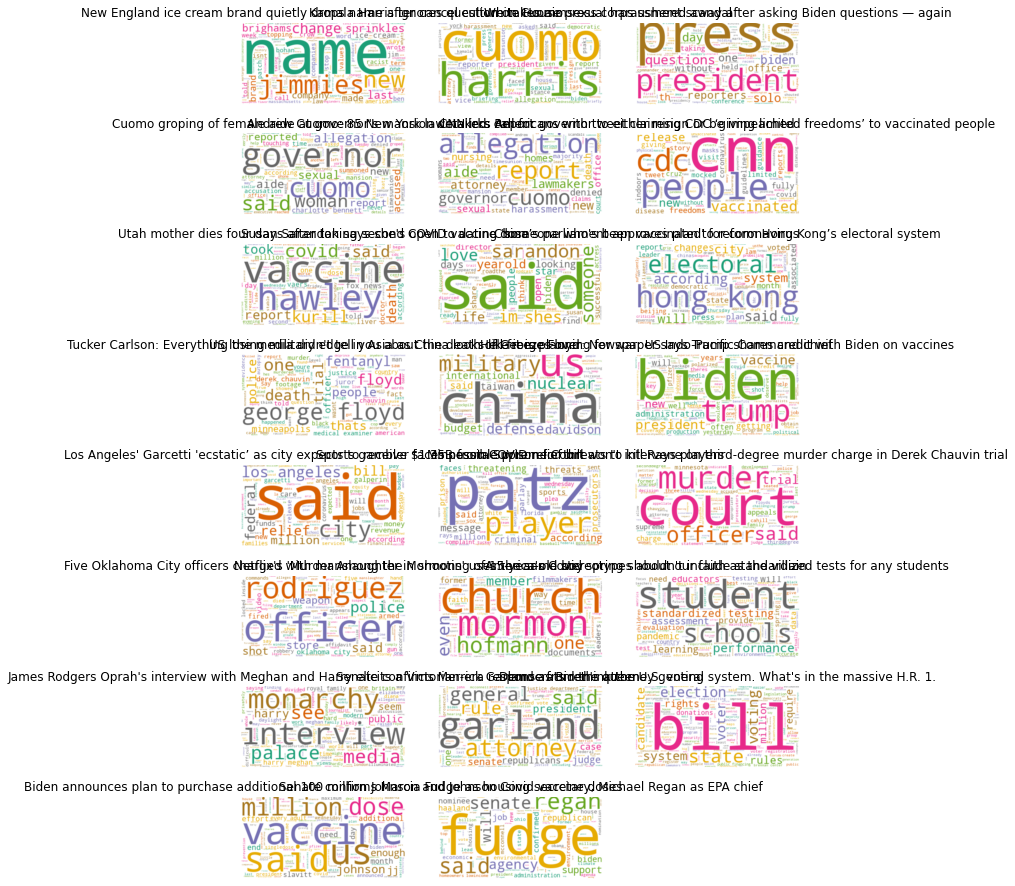

In [51]:
saved_guardian = word_clouds(df_guardian, df_guardian_titles, "GUARDIAN_CLOUDS")
saved_ny_times = word_clouds(df_ny_times, df_ny_times_titles, "NY_TIMES_CLOUDS")
saved_economist= word_clouds(df_economist, df_economist_titles, "ECONOMIST_CLOUDS")
saved_huff = word_clouds(df_huff, df_huff_titles, "HUFF_CLOUDS")
saved_nbc = word_clouds(df_nbc, df_nbc_titles, "NBC_CLOUDS")
saved_fox = word_clouds(df_fox, df_fox_titles, "FOX_CLOUDS")


# PDF Creation

### Creating a pdf with our results to later be emailed

#### We create our imports 

In [52]:
!pip install reportlab

     |████████████████████████████████| 2.6MB 19.1MB/s 


In [53]:
from reportlab.pdfgen import canvas
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.pdfmetrics import registerFontFamily
registerFontFamily('Times-Roman',normal='Times-Roman')

### We set the general variables:

In [54]:
fileName = "Daily_Report_Colab.pdf"
documentTitle = "Daily Report"

Topics_title = "These are todays most popular topics"
Wordclouds_title = "Todays most mentioned words"
Summaries = "Todays Summaries"
Summary_title = "Todays summaries: "

### We set each individual pages variables

#### Page 1, First Newspaper 

In [57]:
import textwrap

In [58]:
NewspaperName1 = "The Guardian"

image1_1 = "/content/GUARDIAN_CLOUDSWORD_CLOUD0.png"
image2_1 = "/content/GUARDIAN_CLOUDSWORD_CLOUD1.png"
image3_1 = "/content/GUARDIAN_CLOUDSWORD_CLOUD2.png"
image4_1 = "/content/GUARDIAN_CLOUDSWORD_CLOUD3.png"

title_article1_1 = df_guardian_titles[0]
title_article2_1 = df_guardian_titles[1]
title_article3_1 = df_guardian_titles[2]
title_article4_1 = df_guardian_titles[3]


Summary1_1 = df_guardian.Summaries[0]
Summary2_1 = df_guardian.Summaries[1]
Summary3_1 = df_guardian.Summaries[2]
Summary4_1 = df_guardian.Summaries[3]

# Splitting our summaries at each dot(.)

Summary1_1 = textwrap.wrap(Summary1_1, 140)
Summary2_1 = textwrap.wrap(Summary2_1, 140)
Summary3_1 = textwrap.wrap(Summary3_1, 140)
Summary4_1 = textwrap.wrap(Summary4_1, 140)


#### Page 2, Second Newspaper

In [60]:
NewspaperName2 = "NY Times"

image1_2 = "/content/NY_TIMES_CLOUDSWORD_CLOUD0.png"
image2_2 = "/content/NY_TIMES_CLOUDSWORD_CLOUD1.png"
image3_2 = "/content/NY_TIMES_CLOUDSWORD_CLOUD2.png"
image4_2 = "/content/NY_TIMES_CLOUDSWORD_CLOUD3.png"

title_article1_2 = df_ny_times_titles[0]
title_article2_2 = df_ny_times_titles[1]
title_article3_2 = df_ny_times_titles[2]
title_article4_2 = df_ny_times_titles[3]


Summary1_2 = df_ny_times.Summaries[0]
Summary2_2 = df_ny_times.Summaries[1]
Summary3_2 = df_ny_times.Summaries[2]
Summary4_2 = df_ny_times.Summaries[3]

# Splitting our summaries at each dot(.)

Summary1_2 = textwrap.wrap(Summary1_2, 140)
Summary2_2 = textwrap.wrap(Summary2_2, 140)
Summary3_2 = textwrap.wrap(Summary3_2, 140)
Summary4_2 = textwrap.wrap(Summary4_2, 140)

#### Page 3 , Third Newspaper 

In [61]:
NewspaperName3 = "Economist"

image1_3 = "/content/ECONOMIST_CLOUDSWORD_CLOUD0.png"
image2_3 = "/content/ECONOMIST_CLOUDSWORD_CLOUD1.png"
image3_3 = "/content/ECONOMIST_CLOUDSWORD_CLOUD2.png"
image4_3 = "/content/ECONOMIST_CLOUDSWORD_CLOUD3.png"

title_article1_3 = df_economist_titles[0]
title_article2_3 = df_economist_titles[1]
title_article3_3 = df_economist_titles[2]
title_article4_3 = df_economist_titles[3]


Summary1_3 = df_economist.Summaries[0]
Summary2_3 = df_economist.Summaries[1]
Summary3_3 = df_economist.Summaries[2]
Summary4_3 = df_economist.Summaries[3]

# Splitting our summaries at each dot(.)

Summary1_3 = textwrap.wrap(Summary1_3, 140)
Summary2_3 = textwrap.wrap(Summary2_3, 140)
Summary3_3 = textwrap.wrap(Summary3_3, 140)
Summary4_3 = textwrap.wrap(Summary4_3, 140)

#### Page 4, Fourth Newspaper 

In [62]:
NewspaperName4 = "Huffington post"

image1_4 = "/content/HUFF_CLOUDSWORD_CLOUD0.png"
image2_4 = "/content/HUFF_CLOUDSWORD_CLOUD1.png"
image3_4 = "/content/HUFF_CLOUDSWORD_CLOUD2.png"
image4_4 = "/content/HUFF_CLOUDSWORD_CLOUD3.png"

title_article1_4 = df_huff_titles[0]
title_article2_4 = df_huff_titles[1]
title_article3_4 = df_huff_titles[2]
title_article4_4 = df_huff_titles[3]


Summary1_4 = df_huff.Summaries[0]
Summary2_4 = df_huff.Summaries[1]
Summary3_4 = df_huff.Summaries[2]
Summary4_4 = df_huff.Summaries[3]

# Splitting our summaries at each dot(.)

Summary1_4 = textwrap.wrap(Summary1_4, 140)
Summary2_4 = textwrap.wrap(Summary2_4, 140)
Summary3_4 = textwrap.wrap(Summary3_4, 140)
Summary4_4 = textwrap.wrap(Summary4_4, 140)

#### Page 5, Fifth Newspaper

In [63]:
NewspaperName5 = "NBC News"

image1_5 = "/content/NBC_CLOUDSWORD_CLOUD0.png"
image2_5 = "/content/NBC_CLOUDSWORD_CLOUD1.png"
image3_5 = "/content/NBC_CLOUDSWORD_CLOUD2.png"
image4_5 = "/content/NBC_CLOUDSWORD_CLOUD3.png"

title_article1_5 = df_nbc_titles[0]
title_article2_5 = df_nbc_titles[1]
title_article3_5 = df_nbc_titles[2]
title_article4_5 = df_nbc_titles[3]


Summary1_5 = df_nbc.Summaries[0]
Summary2_5 = df_nbc.Summaries[1]
Summary3_5 = df_nbc.Summaries[2]
Summary4_5 = df_nbc.Summaries[3]

# Splitting our summaries at each dot(.)

Summary1_5 = textwrap.wrap(Summary1_5, 140)
Summary2_5 = textwrap.wrap(Summary2_5, 140)
Summary3_5 = textwrap.wrap(Summary3_5, 140)
Summary4_5 = textwrap.wrap(Summary4_5, 140)

#### Page 6, Sixth Newspaper

In [64]:
NewspaperName6 = "Fox News"

image1_6 = "/content/FOX_CLOUDSWORD_CLOUD0.png"
image2_6 = "/content/FOX_CLOUDSWORD_CLOUD1.png"
image3_6 = "/content/FOX_CLOUDSWORD_CLOUD2.png"
image4_6 = "/content/FOX_CLOUDSWORD_CLOUD3.png"

title_article1_6 = df_fox_titles[0]
title_article2_6 = df_fox_titles[1]
title_article3_6 = df_fox_titles[2]
title_article4_6 = df_fox_titles[3]


Summary1_6 = df_fox.Summaries[0]
Summary2_6 = df_fox.Summaries[1]
Summary3_6 = df_fox.Summaries[2]
Summary4_6 = df_fox.Summaries[3]

# Splitting our summaries at each dot(.)

Summary1_6 = textwrap.wrap(Summary1_6, 140)
Summary2_6 = textwrap.wrap(Summary2_6, 140)
Summary3_6 = textwrap.wrap(Summary3_6, 140)
Summary4_6 = textwrap.wrap(Summary4_6, 140)

### Creating the PDF and saving it
To do this we define a canvas and set all the coordinates individually for each element ("If u have gotten this far and you are reading this, and know of a more time efficient way to do this please let me know, i don't want to ever have to go through this again")

In [65]:
## We created a ruler to help with organisation
def drawMyRuler(pdf):
    pdf.drawString(100,810, 'x100')
    pdf.drawString(200,810, 'x200')
    pdf.drawString(300,810, 'x300')
    pdf.drawString(400,810, 'x400')
    pdf.drawString(500,810, 'x500')

    pdf.drawString(10,100, 'y100')
    pdf.drawString(10,200, 'y200')
    pdf.drawString(10,300, 'y300')
    pdf.drawString(10,400, 'y400')
    pdf.drawString(10,500, 'y500')
    pdf.drawString(10,600, 'y600')
    pdf.drawString(10,700, 'y700')
    pdf.drawString(10,800, 'y800') 
    
    
#we commented it out in the final verision

In [66]:
pdf = canvas.Canvas(fileName)

pdf.setTitle(documentTitle)

#drawMyRuler(pdf)

###We start##########################################################################################

# we set title font for each newspaper
pdf.setFont("Times-Roman", 32)
# we create the main title 
pdf.drawCentredString(300, 780, NewspaperName1)

#now we want to create a place at the top  for the word clouds: 
# first we set the font for the title 
pdf.setFont("Times-Roman", 15)
# we set the title and center it 
pdf.drawString(30, 764, Wordclouds_title)

#We now place our ####################image 1_1

pdf.drawInlineImage(image1_1, 40, 630, 210, 112)
#Title 1 

pdf.setFont("Times-Roman", 6.6)
pdf.drawString(25, 745, title_article1_1)
#We now place our ######################image 2_1

pdf.drawInlineImage(image2_1, 275, 630, 210, 112)
#title 2 
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 745, title_article2_1)

#We now place our #############################image 3_1
pdf.drawInlineImage(image3_1, 40, 500, 210, 112)
#title 3
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 615, title_article3_1)

#We now place our #######################image 4_1
pdf.drawInlineImage(image4_1, 275, 500, 210, 112)

#title 4
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 615, title_article4_1)


######################################### Summaries 
#Title 

pdf.setFont("Times-Roman", 18)
# we set the title and center it 
pdf.drawString(30, 480, Summary_title)

#title for first summary##################### title_article1_1 

pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 460, title_article1_1)

########################################### summmary1_1 

text = pdf.beginText(35, 445) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary1_1:
    text.textLine(line)
    
pdf.drawText(text)


#Title for second summary:################title_article2_1 
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 360, title_article2_1)

#sum2 ######################################summary 2_1
text = pdf.beginText(35, 347) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary2_1:
    text.textLine(line)
    
pdf.drawText(text)


#title for third summary ################title_article3_1

pdf.setFont("Times-Roman", 12)
pdf.drawString(35, 290, title_article3_1)

# sum3

text = pdf.beginText(35, 277) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary3_1:
    text.textLine(line)
    
pdf.drawText(text)


#Title for fourth summary: ################title_article4_1 
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 200, title_article4_1)

#sum4
text = pdf.beginText(35, 187) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary4_1:
    text.textLine(line)
    
pdf.drawText(text)



pdf.showPage()


#####New Page########
###We start #####################################################################################
# we set title font for each newspaper
pdf.setFont("Times-Roman", 32)
# we create the main title 
pdf.drawCentredString(300, 780, NewspaperName2)

#now we want to create a place top right for the word clouds: 
# firts we set the font for the title 
pdf.setFont("Times-Roman", 15)
# we set the title and center it 
pdf.drawString(30, 764, Wordclouds_title)


#We now place our image 1############################ image 1_2

pdf.drawInlineImage(image1_2, 40, 630, 210, 112)
#Title 1 

pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 745, title_article1_2)
#We now place our image 2 ############################ image 2_2

pdf.drawInlineImage(image2_2, 275, 630, 210, 112)
#title 2 
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 745, title_article2_2)

#We now place our ############################ image 3_2
pdf.drawInlineImage(image3_2, 40, 500, 210, 112)
#title 3
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 615, title_article3_2)

#We now place our ############################ image 4_2
pdf.drawInlineImage(image4_2, 275, 500, 210, 112)

#title 4 
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 615, title_article4_2)

#
# #################################Summaries 2
#Title 



pdf.setFont("Times-Roman", 18)
# we set the title and center it 
pdf.drawString(30, 480, Summary_title)

#title for first summary############################ title_article1_2 

pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 460, title_article1_2)

# sum1 

text = pdf.beginText(35, 445) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary1_2:
    text.textLine(line)
    
pdf.drawText(text)


#Title for second summary: ############################ title_article2_2
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 360, title_article2_2)

#sum2 
text = pdf.beginText(35, 347) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary2_2:
    text.textLine(line)
    
pdf.drawText(text)


#title for third summary ############################  title_article3_2

pdf.setFont("Times-Roman", 12)
pdf.drawString(35, 290, title_article3_2)

# sum3

text = pdf.beginText(35, 277) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary3_2:
    text.textLine(line)
    
pdf.drawText(text)


#Title for second summary: ############################ title_article4_2
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 200, title_article4_2)

#sum2 
text = pdf.beginText(35, 187) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary4_2:
    text.textLine(line)
    
pdf.drawText(text)



pdf.showPage()

#### Page 3 ########
###We start ########################################################################################
# we set title font for each newspaper
pdf.setFont("Times-Roman", 32)
# we create the main title 
pdf.drawCentredString(300, 780, NewspaperName3)

#now we want to create a place top right for the word clouds: 
# firts we set the font for the title 
pdf.setFont("Times-Roman", 15)
# we set the title and center it 
pdf.drawString(30, 764, Wordclouds_title)


#We now place our ################################## image 1_3

pdf.drawInlineImage(image1_3, 40, 630, 210, 112)
#Title 1 

pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 745, title_article1_3)
#We now place our image 2

#title 2 ############################ ############################ image 2_3
pdf.drawInlineImage(image2_3, 275, 630, 210, 112)
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 745, title_article2_3)

#We now place our  ############################ image 3_3
pdf.drawInlineImage(image3_3, 40, 500, 210, 112)
#title 3
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 615, title_article3_3)

#We now place our  ############################ image 4_3
pdf.drawInlineImage(image4_3, 275, 500, 210, 112)

#title 4
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 615, title_article4_3)


# Summaries 
#Title 



pdf.setFont("Times-Roman", 18)
# we set the title and center it 
pdf.drawString(30, 480, Summary_title)

#title for first summary 
 ############################  ############################ title_article1_3
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 460, title_article1_3)

# sum1 

text = pdf.beginText(35, 445) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary1_3:
    text.textLine(line)
    
pdf.drawText(text)

 ############################  ############################ title_article2_3
#Title for second summary: 
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 360, title_article2_3)

#sum2 
text = pdf.beginText(35, 347) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary2_3:
    text.textLine(line)
    
pdf.drawText(text)

 ############################  ############################ title_article3_3
#title for third summary 

pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 290, title_article3_3)

# sum3

text = pdf.beginText(35, 277) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary2_3:
    text.textLine(line)
    
pdf.drawText(text)

 ############################  ############################ title_article4_3
#Title for second summary: 
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 200, title_article4_3)

#sum2 
text = pdf.beginText(35, 187) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary4_3:
    text.textLine(line)
    
pdf.drawText(text)


pdf.showPage()


### Page 4#####
###We start ########################################################################################
# we set title font for each newspaper
pdf.setFont("Times-Roman", 32)
# we create the main title 
pdf.drawCentredString(300, 780, NewspaperName4)

#now we want to create a place top right for the word clouds: 
# firts we set the font for the title 
pdf.setFont("Times-Roman", 15)
# we set the title and center it 
pdf.drawString(30, 764, Wordclouds_title)


#We now place our########################################### image 1_4

pdf.drawInlineImage(image1_4, 40, 630, 210, 112)
#Title 1 

pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 745, title_article1_4)
#We now place our image 2
########################################### image 2_4
pdf.drawInlineImage(image2_4, 275, 630, 210, 112)
#title 2  ima
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 745, title_article2_4)

#We now place our ###########################################  image 3_4
pdf.drawInlineImage(image3_4, 40, 500, 210, 112)
#title 3
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 615, title_article3_4)

#We now place our ########################################### image 4_4
pdf.drawInlineImage(image4_4, 275, 500, 210, 112)

#title 4
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 615, title_article4_4)


# Summaries 
#Title 



pdf.setFont("Times-Roman", 18)
# we set the title and center it 
pdf.drawString(30, 480, Summary_title)

#title for first summary ########################################### title_article1_4

pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 460, title_article1_4)

# sum1 

text = pdf.beginText(35, 445) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary1_4:
    text.textLine(line)
    
pdf.drawText(text)


#Title for second summary: ########################################### title_article2_4
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 360, title_article2_4)

#sum2 
text = pdf.beginText(35, 347) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary2_4:
    text.textLine(line)
    
pdf.drawText(text)


#title for third summary ########################################### title_article3_4

pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 290, title_article3_4)

# sum3

text = pdf.beginText(35, 277) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary3_4:
    text.textLine(line)
    
pdf.drawText(text)


#Title for second summary: ########################################### title_article4_4
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 200, title_article4_4)

#sum2 
text = pdf.beginText(35, 187) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary4_4:
    text.textLine(line)
    
pdf.drawText(text)



pdf.showPage()

#### Page 5 ######
###We start ########################################################################################
# we set title font for each newspaper
pdf.setFont("Times-Roman", 32)
# we create the main title 
pdf.drawCentredString(300, 780, NewspaperName5)

#now we want to create a place top right for the word clouds: 
# firts we set the font for the title 
pdf.setFont("Times-Roman", 15)
# we set the title and center it 
pdf.drawString(30, 764, Wordclouds_title)


#We now place our ########################################### image 1_5

pdf.drawInlineImage(image1_5, 40, 630, 210, 112)
#Title 1 

pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 745, title_article1_5)
#We now place our ############################### image 2_5

pdf.drawInlineImage(image2_5, 275, 630, 210, 112)
#title 2 
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 745, title_article2_5)

#We now place our ############################### image 3_5
pdf.drawInlineImage(image3_5, 40, 500, 210, 112)
#title 3
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 615, title_article3_5)

#We now place our ############################### image 4_5
pdf.drawInlineImage(image4_5, 275, 500, 210, 112)

#title 4
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 615, title_article4_5)


# Summaries 
#Title 



pdf.setFont("Times-Roman", 18)
# we set the title and center it 
pdf.drawString(30, 480, Summary_title)

#title for first summary 
############################### ############################### title_article1_5
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 460, title_article1_5)

# sum1 

text = pdf.beginText(35, 445) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary1_5:
    text.textLine(line)
    
pdf.drawText(text)

############################### ############################### title_article2_5
#Title for second summary: 
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 360, title_article2_5)

#sum2 
text = pdf.beginText(35, 347) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary2_5:
    text.textLine(line)
    
pdf.drawText(text)

############################### ############################### title_article3_5
#title for third summary 

pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 290, title_article3_5)

# sum3

text = pdf.beginText(35, 277) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary3_5:
    text.textLine(line)
    
pdf.drawText(text)

############################### ############################### title_article4_5
#Title for second summary: 
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 200, title_article4_5)

#sum2 
text = pdf.beginText(35, 187) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary4_5:
    text.textLine(line)
    
pdf.drawText(text)



pdf.showPage()


## Page 6 #### like really 6 pages who tf had this idea, wait
##me # fak
###We start ########################################################################################
# we set title font for each newspaper
pdf.setFont("Times-Roman", 32)
# we create the main title 
pdf.drawCentredString(300, 780, NewspaperName6)

#now we want to create a place top right for the word clouds: 
# firts we set the font for the title 
pdf.setFont("Times-Roman", 15)
# we set the title and center it 
pdf.drawString(30, 764, Wordclouds_title)


#We now place our############################### ###################### image 1_6

pdf.drawInlineImage(image1_6, 40, 630, 210, 112)
#Title 1 

pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 745, title_article1_6)
#We now place our############################### ##################  image 2_6

pdf.drawInlineImage(image2_6, 275, 630, 210, 112)
#title 2 
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 745, title_article2_6)

#We now place our ############################### image 3_6
pdf.drawInlineImage(image3_6, 40, 500, 210, 112)
#title 3
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(25, 615, title_article3_6)

#We now place our ############################### image 4_6
pdf.drawInlineImage(image4_6, 275, 500, 210, 112)

#title 4
pdf.setFont("Times-Roman", 6.5)
pdf.drawString(275, 615, title_article4_6)




# Summaries 
#Title 



pdf.setFont("Times-Roman", 18)
# we set the title and center it 
pdf.drawString(30, 480, Summary_title)

#title for first summary 
############################### ############################### title_article1_6
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 460, title_article1_6)

# sum1 

text = pdf.beginText(35, 445) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary1_6:
    text.textLine(line)
    
pdf.drawText(text)

############################### ############################### title_article2_6
#Title for second summary: 
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 360, title_article2_6)

#sum2 
text = pdf.beginText(35, 347) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary2_6:
    text.textLine(line)
    
pdf.drawText(text)

############################### ############################### title_artivle3_6
#title for third summary 

pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 290, title_article3_6)

# sum3

text = pdf.beginText(35, 277) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary3_6:
    text.textLine(line)
    
pdf.drawText(text)

############################### ############################### title_article4_6
#Title for second summary: 
pdf.setFont("Times-Roman", 12)
pdf.drawString(30, 200, title_article4_6)

#sum2 
text = pdf.beginText(35, 187) # coordinates
pdf.setFont("Times-Roman", 9)# new font
for line in Summary4_6:
    text.textLine(line)
    
pdf.drawText(text)


pdf.save()

# Automatization and Email

### We import the variables we have set in our os  

In [67]:

# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'Daily_report.pdf'})
uploaded.SetContentFile("/content/Daily_Report_Colab.pdf")
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1ngwv41VP7nOCtEHWHiEWI2YjpJHd9OH1


### We set the contents of the email 

### We send the email with the report 